# データ・サイエンス	データ・サイエンス社会応用論 / ICT社会応用演習Ⅳ
## GeoPandasの練習

In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

#### 1. データの読み込み

In [17]:
gdf1 = gpd.GeoDataFrame({
    'name': ['INIAD', 'HAKUSAN', 'KAWAGOE'],
    'geometry': [Point(139.715514, 35.7804420), Point(139.750289, 35.722939), Point(139.432321, 35.935428)]
}, crs="EPSG:4326")
gdf1

,name,geometry
0,INIAD,POINT (139.71551 35.78044)
1,HAKUSAN,POINT (139.75029 35.72294)
2,KAWAGOE,POINT (139.43232 35.93543)


In [18]:
gdf2 = gpd.GeoDataFrame({
    'name': ['Area'],
    'geometry': [Polygon([(139.6, 35.6), (139.6, 35.8), (139.8, 35.8), (139.8, 35.6)])]
}, crs="EPSG:4326")
gdf2

,name,geometry
0,Area,"POLYGON ((139.60000 35.60000, 139.60000 35.800..."


In [19]:
FILE_PATH = 'data/nl/N03-20240101_13.geojson'
gdf3 = gpd.read_file(FILE_PATH)
gdf3

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.28925 30.48135, 140.28968 30.480..."
1,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.82167 35.58322, 139.82187 35.583..."
2,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.84130 35.64702, 139.84129 35.646..."
3,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.05004 31.43993, 140.05002 31.439..."
4,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.34167 29.79385, 140.34174 29.793..."
...,...,...,...,...,...,...,...
6899,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.28634 24.79924, 141.28633 24.799..."
6900,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29279 24.74890, 141.29278 24.748..."
6901,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.37959 24.78060, 141.37958 24.780..."
6902,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29002 24.74740, 141.29002 24.747..."


In [20]:
gdf3.area

/tmp/ipykernel_34553/833977987.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf3.area


0       4.491235e-04
1       2.345734e-04
2       1.117510e-04
3       2.070065e-06
4       3.506428e-07
            ...     
6899    8.591910e-11
6900    8.408025e-11
6901    8.206725e-11
6902    7.913260e-11
6903    7.617625e-11
Length: 6904, dtype: float64

In [21]:
gdf3.centroid

/tmp/ipykernel_34553/3206955069.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf3.centroid


0       POINT (140.30127 30.48449)
1       POINT (139.81886 35.58808)
2       POINT (139.84584 35.64961)
3       POINT (140.05059 31.43887)
4       POINT (140.34192 29.79409)
                   ...            
6899    POINT (141.28633 24.79924)
6900    POINT (141.29278 24.74890)
6901    POINT (141.37958 24.78060)
6902    POINT (141.29002 24.74740)
6903    POINT (141.37960 24.78061)
Length: 6904, dtype: geometry

In [22]:
gdf3.boundary

0       LINESTRING (140.28925 30.48135, 140.28968 30.4...
1       LINESTRING (139.82167 35.58322, 139.82187 35.5...
2       LINESTRING (139.84130 35.64702, 139.84129 35.6...
3       LINESTRING (140.05004 31.43993, 140.05002 31.4...
4       LINESTRING (140.34167 29.79385, 140.34174 29.7...
                              ...                        
6899    LINESTRING (141.28634 24.79924, 141.28633 24.7...
6900    LINESTRING (141.29279 24.74890, 141.29278 24.7...
6901    LINESTRING (141.37959 24.78060, 141.37958 24.7...
6902    LINESTRING (141.29002 24.74740, 141.29002 24.7...
6903    LINESTRING (141.37960 24.78061, 141.37961 24.7...
Length: 6904, dtype: geometry

座標系変換

In [23]:
gdf3.to_crs('epsg:6691').area

0       4.777263e+06
1       2.357542e+06
2       1.122273e+06
3       2.180629e+04
4       3.755354e+03
            ...     
6899    9.615728e-01
6900    9.413672e-01
6901    9.186137e-01
6902    8.859831e-01
6903    8.526732e-01
Length: 6904, dtype: float64

#### 2. 地図上への表示

<Axes: >

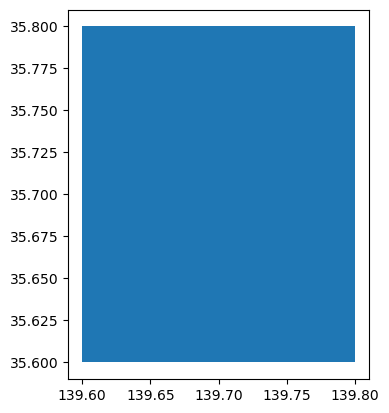

In [24]:
gdf2.plot()

In [25]:
gdf2.explore()

#### 3. 空間解析

In [26]:
polygon = Polygon([(139.6, 35.6), (139.6, 35.8), (139.8, 35.8), (139.8, 35.6)])
gdf3[gdf3.within(polygon)].explore()

In [27]:
polygon = Polygon([(139.6, 35.6), (139.6, 35.8), (139.8, 35.8), (139.8, 35.6)])
gdf3[gdf3.intersects(polygon)].explore()

In [28]:
gdf3.dissolve(by='N03_007')

,geometry,N03_001,N03_002,N03_003,N03_004,N03_005
N03_007,,,,,,
13000,"MULTIPOLYGON (((140.34167 29.79385, 140.34161 ...",東京都,None,None,所属未定地,None
13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None
13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None
13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None
13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None
...,...,...,...,...,...,...
13381,"MULTIPOLYGON (((139.38455 34.04434, 139.38458 ...",東京都,None,None,三宅村,None
13382,"MULTIPOLYGON (((139.29851 33.65146, 139.29837 ...",東京都,None,None,御蔵島村,None
13401,"MULTIPOLYGON (((139.83879 33.04832, 139.83878 ...",東京都,None,None,八丈町,None


In [29]:
gdf1.sjoin(gdf2, how='inner', predicate='within')

,name_left,geometry,index_right,name_right
0,INIAD,POINT (139.71551 35.78044),0,Area
1,HAKUSAN,POINT (139.75029 35.72294),0,Area


In [30]:
gdf3.sjoin(gdf1, how='inner', predicate='contains')

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry,index_right,name
135,東京都,None,None,文京区,None,13105,"POLYGON ((139.75000 35.73338, 139.75000 35.733...",1,HAKUSAN
231,東京都,None,None,北区,None,13117,"POLYGON ((139.75694 35.73333, 139.75788 35.732...",0,INIAD
